In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.neural_network import MLPRegressor

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/IMC.csv'
df_imc=pd.read_csv(path, sep=',', header=0, )
print(df_imc.head())

   Height  Weight        IMC
0     174      96  31.708284
1     189      87  24.355421
2     185     110  32.140248
3     195     104  27.350427
4     149      61  27.476240


In [ ]:
max = {'Height':200, 'Weight': 200 , 'IMC': 100}
max = pd.Series(data=max, index=['Height', 'Weight', 'IMC'])
print(max)

Height    200
Weight    200
IMC       100
dtype: int64


In [ ]:
df_nimc=df_imc/max
print(df_nimc.head())

   Height  Weight       IMC
0   0.870   0.480  0.317083
1   0.945   0.435  0.243554
2   0.925   0.550  0.321402
3   0.975   0.520  0.273504
4   0.745   0.305  0.274762


In [ ]:
train, test = train_test_split(df_nimc, test_size=0.30, shuffle=True)
print(len(train))
print(len(test))
x_train=train[['Height','Weight']]
y_train=train['IMC'].ravel()

x_test=test[['Height','Weight']]
y_test=test['IMC'].ravel()


350
150


In [ ]:
reg = MLPRegressor(solver= 'lbfgs',learning_rate='constant',learning_rate_init=0.001 ,hidden_layer_sizes=(10,5,),activation='logistic',random_state=1, max_iter=500, verbose=True)
history=reg.fit(x_train, y_train)


In [ ]:
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(x_test[:10])
print(y_test[:10])
print(y_pred[:10])


print('r2',r2)

     Height  Weight
194   0.705   0.470
120   0.840   0.435
330   0.820   0.800
373   0.815   0.315
207   0.980   0.610
380   0.795   0.600
123   0.920   0.800
430   0.890   0.395
396   0.935   0.480
182   0.810   0.485
[0.47281324 0.3082483  0.594884   0.23711845 0.31757601 0.47466477
 0.47258979 0.2493372  0.27452887 0.36960829]
[0.44369369 0.30232269 0.63707035 0.25970778 0.2998121  0.46016948
 0.51199969 0.24785168 0.25922545 0.3569377 ]
r2 0.9815863798426546


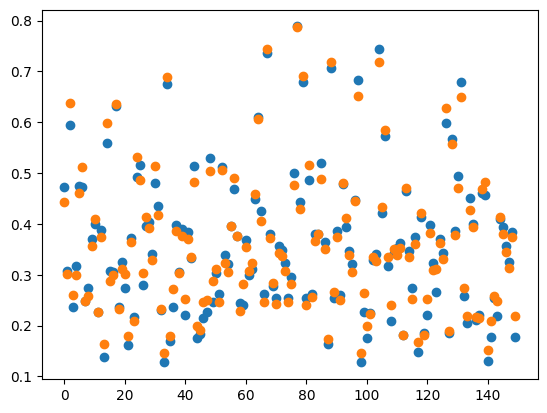

In [ ]:
plt.scatter(range(len(x_test)),y_test)
plt.scatter(range(len(x_test)),y_pred)